In [2]:
import pandas as pd

In [3]:
traindf = pd.read_csv(r'C:\Users\Gabriela Nathania H\Desktop\shopee-product-detection-student\train.csv')
traindf

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3
2,f6c172096818c5fab10ecae722840798.jpg,3
3,251ffd610399ac00fea7709c642676ee.jpg,3
4,73c7328b8eda399199fdedec6e4badaf.jpg,3
...,...,...
105385,047a60001de0331608ba64092cc7ae2b.jpg,25
105386,ea39ac66ccdc4b4d4c6443f6c54d8ae3.jpg,25
105387,6215f8c52c5bbcfe3e63e0f3ac6265f8.jpg,25
105388,1733d8286f6658149c7b7cdeb40d6461.jpg,25


In [9]:
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [105]:
IMG_SIZE = 168
path = r"C:\Users\Gabriela Nathania H\Desktop\shopee-product-detection-student\train\train\train"
train_generator=datagen.flow_from_directory(
                                            path,
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            batch_size=64,
                                            class_mode='categorical'
                                            )

Found 105390 images belonging to 42 classes.


In [106]:
from keras.models import Sequential
from keras import models, layers
from tensorflow.keras.layers import Conv2D
import keras

model = Sequential()
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', padding='same',input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(42, activation = 'softmax'))

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 168, 168, 32)      896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 84, 84, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 84, 84, 32)        128       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 82, 82, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 41, 41, 64)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 41, 41, 64)        256       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 39, 39, 64)      

In [122]:
hist = model.fit_generator(
    train_generator,
    epochs=3)

Epoch 1/3
1647/1647 [==============================] - 4163s 3s/step - loss: 0.0488 - accuracy: 0.9850
Epoch 2/3
1647/1647 [==============================] - 3849s 2s/step - loss: 0.0476 - accuracy: 0.9853
Epoch 3/3
1647/1647 [==============================] - 4128s 3s/step - loss: 0.0464 - accuracy: 0.9856


array([8], dtype=int64)

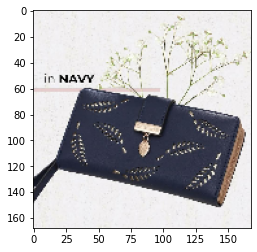

In [148]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

image_path=r"C:\Users\Gabriela Nathania H\Desktop\shopee-product-detection-student\train\train\train\08\00c8042bfdac9119d6b953ace15a9e80.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
result

In [123]:
testdf = pd.read_csv(r'C:\Users\Gabriela Nathania H\Desktop\shopee-product-detection-student\test.csv')
testdf

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
2,127f3e6d6e3491b2459812353f33a913.jpg,43
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,43
4,46d681a542f2c71be017eef6aae23313.jpg,43
...,...,...
12181,5ba958eacb23cd7d1673bad4dae55784.jpg,43
12182,efbe41a1c2b666b70e337e438559808b.jpg,43
12183,79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg,43
12184,ac3d136124617637a05ba66694e381ef.jpg,43


In [124]:
import os
batch_holder = np.zeros((len(testdf), IMG_SIZE, IMG_SIZE, 3))
img_dir=r"C:\Users\Gabriela Nathania H\Desktop\shopee-product-detection-student\test\test\test\\"
for i,tmp in enumerate(testdf['filename']):
    img = image.load_img(os.path.join(img_dir,tmp), target_size=(IMG_SIZE,IMG_SIZE))
    batch_holder[i, :] = img

In [125]:
result=model.predict_classes(batch_holder)

In [126]:
testdf['category'] = result

In [137]:
testdf.to_csv(r'C:\Users\Gabriela Nathania H\Desktop\shopee-product-detection-student\ans_00.csv',index=False)

In [129]:
testdf

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,10
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,27
2,127f3e6d6e3491b2459812353f33a913.jpg,4
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,22
4,46d681a542f2c71be017eef6aae23313.jpg,12
...,...,...
12181,5ba958eacb23cd7d1673bad4dae55784.jpg,16
12182,efbe41a1c2b666b70e337e438559808b.jpg,19
12183,79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg,34
12184,ac3d136124617637a05ba66694e381ef.jpg,15


In [132]:
testdf['category'] = testdf['category'].apply(str)

In [135]:
tmp = []
for p in testdf['category']:
    if(len(p)==1): p = "0" + p
    tmp.append(p)
testdf['category'] = tmp

In [136]:
testdf

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,10
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,27
2,127f3e6d6e3491b2459812353f33a913.jpg,04
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,22
4,46d681a542f2c71be017eef6aae23313.jpg,12
...,...,...
12181,5ba958eacb23cd7d1673bad4dae55784.jpg,16
12182,efbe41a1c2b666b70e337e438559808b.jpg,19
12183,79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg,34
12184,ac3d136124617637a05ba66694e381ef.jpg,15


In [138]:
model.save("my_model_53")